<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'winequality_merged.csv'
wine = pd.read_csv('winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER

# Will look for head, tail, shape and info of the data

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [5]:
wine.shape

(6497, 13)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


### 2. Set Target Variable

Create a target variable for wine quality.

In [7]:
# Target Variable

y = wine['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [8]:
# ANSWER

# Will check correlation for quality vs all other columns

wine.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

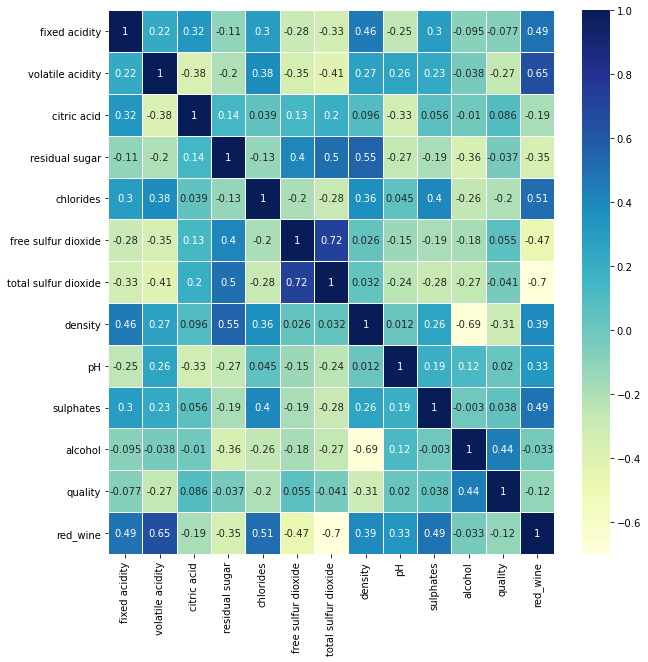

In [9]:
# Or we can use seaborn heatmap

plt.figure(figsize = (10, 10))
sns.heatmap(wine.corr(), cmap = 'YlGnBu', annot= True, cbar = True, linewidths = .5)
plt.show()

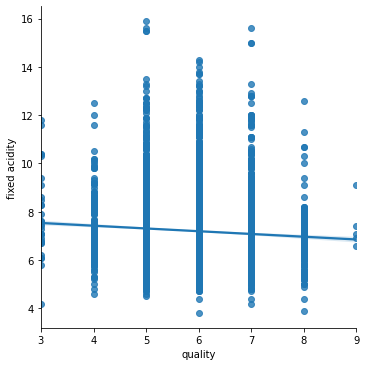

In [10]:
# Will visualize quality vs fixed acidity

sns.lmplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.show()

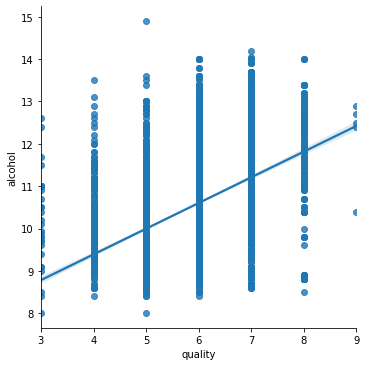

In [11]:
# Will visualize qualiy vs alcohol
sns.lmplot(x = 'quality', y= 'alcohol', data = wine)
plt.show()

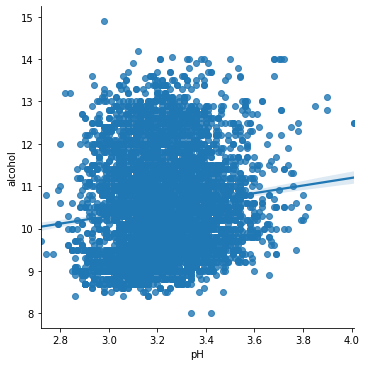

In [12]:
# From the heatmap table it seems like alcohol and pH are positively correlated. Will visualize them as well

sns.lmplot(x= 'pH', y= 'alcohol', data = wine)
plt.show()

In [13]:
# Graph above won't give much of idea other than 2 variables are positivly correlated.

### 4. Using Linear Regression Create a Model and Test Score

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [16]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
# Create a model for Linear Regression
linreg = LinearRegression()

In [18]:
# Fit the model with the Training data
linreg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Calculate the score (R^2 for Regression) for Training Data
linreg.score(X_train, y_train)

0.3029447101867324

In [20]:
# Calculate the score (R^2 for Regression) for Testing Data
linreg.score(X_test, y_test)

0.26715748512625603

### BONUS: Cross validation

In [21]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [22]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    linreg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_pred = linreg.predict(X_train)
    test_pred = linreg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append(linreg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_pred, squared = False))
    test_rmse.append(mean_squared_error(y_test, test_pred, squared = False))
    
# Create a metrics_df dataframe to display r2 and rmse scores

metrics_df = pd.DataFrame({'TrainR2' : train_scores, 'TestR2' : test_scores, 'TrainRMSE' : train_rmse, 'TestRMSE' : test_rmse})
metrics_df

,TrainR2,TestR2,TrainRMSE,TestRMSE
0,0.302339,0.271661,0.729911,0.742852
1,0.292618,0.310376,0.733082,0.730291
2,0.296491,0.293125,0.732666,0.731877
3,0.305865,0.252276,0.730812,0.740457
4,0.286979,0.331035,0.734322,0.725594


In [23]:
# Describe the metrics

metrics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TrainR2,5.0,0.296858,0.007531,0.286979,0.292618,0.296491,0.302339,0.305865
TestR2,5.0,0.291694,0.031040,0.252276,0.271661,0.293125,0.310376,0.331035
TrainRMSE,5.0,0.732159,0.001779,0.729911,0.730812,0.732666,0.733082,0.734322
TestRMSE,5.0,0.734214,0.007224,0.725594,0.730291,0.731877,0.740457,0.742852


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



